**1. Introduction**

 **1.1. Problem Statement**

 Public health decision-making is often reactive, relying on historical prescription data that lags behind real-time needs. This
 project seeks to forecast medicine usage patterns, evaluate drug-associated side effects, and segment regional health
 behavior using public search data. The aim is to create a predictive, scalable system that can guide pharmaceutical firms and
 health policymakers in anticipating demand before prescriptions are written.

 **1.2. Approach**

We leverage multiple machine learning paradigms across diverse tasks:
*   **Risk Scoring:** Rule-based side effect severity quantification
*   **Clustering:** State-wise drug demand segmentation
*   **Forecasting:** National/state drug demand prediction
*  **NLP Modeling:** Use of BERT/BioBERT for medical tag extraction

**1.3. Methodology**

*   **Data Sources:** Google Trends, FDA databases, Kaggle drug metadata
*   **ML Models:** KMeans, Holt-Winters, Prophet, Random Forest, BioBERT
*   **Tools:** Python (Pandas, Scikit-Learn, Statsmodels, Prophet, HuggingFace), Jupyter

**1.4. Consumer Benefit**

Our system serves:
*   **Pharma Marketers:** Strategic planning, market entry analysis
*   **Healthcare Providers:** Public health insights, personalized messaging
*   **Policy Makers:** Proactive risk identification









**2. Data Preparation**

**2.1. Sources & Licensing**

*   **Search Trends:** Google Trends (https://trends.google.com/trends/)
*   **Drug Metadata:** Kaggle Medicine Dataset (https://www.kaggle.com/datasets/singhnavjot2062001/11000-medicine-details)
*   **Regulatory Info:** FDA Drug Databases (https://www.fda.gov/drugs/development-approval-process-drugs/drug-approvals-and-databases)





**2.2. Data Cleaning**

2.2.1. Country-wide downloaded dataset from Google Trends for each Year from 2021 to 2024 and finding out most searched drugs

In [20]:
import pandas as pd
import os

# File paths
folder_path = "/content/rawdata/countrywidedata"
filenames = [
    "2021(1).csv", "2021(2).csv", "2021(3).csv", "2021(4).csv", "2021(5).csv",
    "2022(1).csv", "2022(2).csv", "2022(3).csv",
    "2023(1).csv", "2023(2).csv", "2023(3).csv",
    "2024(1).csv", "2024(2).csv"
]

# Collect all cleaned data
all_data = []

for file in filenames:
    file_path = os.path.join(folder_path, file)

    # Read and reshape
    df = pd.read_csv(file_path, skiprows=2)
    df_melted = df.melt(id_vars=['Week'], var_name='Drug Name', value_name='Value')

    # Clean drug names
    df_melted['Drug Name'] = df_melted['Drug Name'].str.replace(': \(United States\)', '', regex=True).str.strip()

    # Clean values
    df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')
    df_cleaned = df_melted.dropna(subset=['Value'])
    df_cleaned = df_cleaned[df_cleaned['Value'] != 0]

    all_data.append(df_cleaned)

# Combine all and extract unique drug names
final_df = pd.concat(all_data, ignore_index=True)
unique_drugs = final_df['Drug Name'].dropna().unique()
unique_drugs_sorted = sorted(unique_drugs)

unique_drugs_sorted[:50]  # Show only the first 20 for now


['amitriptyline',
 'amphetamine/dextroamphetamine',
 'apixaban',
 'atomoxetine',
 'benztropine',
 'carbamazepine',
 'cefprozil',
 'citalopram',
 'clomipramine',
 'dabigatran',
 'desipramine',
 'dexmethylphenidate',
 'dextroamphetamine-amphetamine',
 'diazepam',
 'dicyclomine',
 'diltiazem',
 'divalproex sodium',
 'dofetilide',
 'duloxetine',
 'ecitalopram',
 'empagliflozin',
 'escitaloprám',
 'fluoxetine',
 'fluvoxamine',
 'guanfacine',
 'hydrocodone acetaminophen',
 'imipramine',
 'lacosamide',
 'liraglutide',
 'lisdexamfetamine',
 'lisdexamfetamine dimesylate',
 'meloxicam',
 'memantine',
 'metronidazole',
 'midodrine',
 'molnupiravir',
 'naproxen',
 'olanzapine',
 'ondansetron',
 'pentoxifylline',
 'pregabalin',
 'prochlorperazine',
 'rivaroxaban',
 'semaglutide',
 'sitagliptin',
 'tenormin',
 'tirzepatide',
 'toprol xl',
 'vyvanse',
 'zolpidem']

2.2.2. For all the obtained drug names searched throughout the range, we need to download search frequency all drugs thoroughout out specified time frame

In [21]:
import pandas as pd
import os

# Updated list of newly uploaded file names (1.csv to 10.csv)
filenames = [f"{i}.csv" for i in range(1, 11)]
folder_path = "/content/rawdata/countrywide_alldrugs"

# Container for cleaned and transformed data
all_data = []

for file in filenames:
    file_path = os.path.join(folder_path, file)

    # Read CSV and skip first 2 rows
    df = pd.read_csv(file_path, skiprows=2)

    # Melt the dataframe: wide to long format
    df_melted = df.melt(id_vars=['Week'], var_name='Drug Name', value_name='Value')

    # Clean Drug Names: remove ": (United States)"
    df_melted['Drug Name'] = df_melted['Drug Name'].str.replace(': \(United States\)', '', regex=True).str.strip()

    # Clean and filter Values: remove '<1', empty, non-numeric, or 0 values
    df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')
    df_cleaned = df_melted.dropna(subset=['Value'])
    df_cleaned = df_cleaned[df_cleaned['Value'] != 0]

    all_data.append(df_cleaned)

# Combine all cleaned data
final_df = pd.concat(all_data, ignore_index=True)

# Export the cleaned and combined DataFrame to a CSV file
output_path = "/content/cleandata/2021_to_2024(Country_wide).csv"
final_df.to_csv(output_path, index=False)


2.2.3. Now we successfully cleaned Countrywide data, we download state-wise search popularity of all the drugs in discussion

In [22]:
import pandas as pd
import os

# Folder path where files are stored
folder_path = "/content/rawdata/statewise_alldrugs"

# List of all filenames
filenames = [
    "amitriptyline.csv","amphetamine-dextroamphetamine.csv","apixaban.csv","atomoxetine.csv","benztropine.csv",
    "carbamazepine.csv", "cefprozil.csv", "citalopram.csv", "clomipramine.csv","dabigatran.csv",
    "dexmethylphenidate.csv","dextroamphetamine-amphetamine.csv", "diltiazem.csv","diazepam.csv","dicyclomine.csv",
    "diltiazem.csv","divalproex sodium.csv", "dofetilide.csv", "duloxetine.csv","ecitalopram.csv",
    "empagliflozin.csv", "escitalopram.csv","fluoxetine.csv", "lacosamide.csv", "guanfacine.csv",
    "fluvoxamine.csv", "imipramine.csv", "hydrocodone acetaminophen.csv", "lisdexamfetamine dimesylate.csv", "meloxicam.csv",
    "liraglutide.csv", "lisdexamfetamine.csv", "memantine.csv", "molnupiravir.csv", "olanzapine.csv",
    "ondansetron.csv", "midodrine.csv", "pregabalin.csv", "rivaroxaban.csv", "prochlorperazine.csv",
    "sitagliptin.csv", "tenormin.csv", "semaglutide.csv", "zonisamide.csv", "tirzepatide.csv",
    "zolpidem.csv", "toprol xl.csv", "vyvanse.csv"
]

# Final logic: Check if the first row contains "Region" and drug name; if not, skip two rows
final_combined_data = []

for file in filenames:
    file_path = os.path.join(folder_path, file)

    try:
        # Read the first row only to inspect header
        preview = pd.read_csv(file_path, nrows=1, header=None)

        # Determine if first row is header or metadata
        if 'Region' in str(preview.iloc[0, 0]) and ':' in str(preview.iloc[0, 1]):
            skip_rows = 0
        else:
            skip_rows = 2

        # Load data with proper row skip
        df = pd.read_csv(file_path, skiprows=skip_rows)

        # Extract drug name from second column
        drug_name = df.columns[1].split(':')[0].strip()

        # Rename and clean
        df.columns = ['State', 'Value']
        df['Drug Name'] = drug_name
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
        df = df.dropna(subset=['Value'])
        df = df[df['Value'] != 0]

        df = df[['Drug Name', 'State', 'Value']]
        final_combined_data.append(df)

    except Exception as e:
        print(f"Error processing {file}: {e}")
        continue

# Combine all
final_df_smart = pd.concat(final_combined_data, ignore_index=True)

# Export result to CSV
final_df_smart.to_csv("/content/cleandata/2021_to_2024(State_wise).csv", index=False)


2.2.4. Now that we got hands-on State-wise data for drug search. Let's collect top 3 drug for state of 'Texas' from which we'll be focussing on drug 'Memantine' in the later part of our analysis

In [23]:
import pandas as pd

# Read the file
df = pd.read_csv("/content/rawdata/texas_2021to2024.csv")

# Melt from wide to long format
df_long = df.melt(id_vars=["Week"], var_name="Drug Name", value_name="Value")

# Optional: remove rows with missing or zero values
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')
df_long = df_long.dropna(subset=['Value'])
df_long = df_long[df_long['Value'] != 0]

# Export to new CSV
df_long.to_csv("/content/cleandata/texas_2021to2024(Cleaned).csv", index=False)


2.2.5. Below's the Preview of all database in usage

In [24]:
final_df.head() #2021_to_2024(Country_wide)

,Week,Drug Name,Value
0,27-12-2020,amitriptyline,69
1,03-01-2021,amitriptyline,83
2,10-01-2021,amitriptyline,84
3,17-01-2021,amitriptyline,80
4,24-01-2021,amitriptyline,97


In [25]:
final_df_smart.head() #2021_to_2024(State_wise)

,Drug Name,State,Value
0,amitriptyline,West Virginia,100.0
1,amitriptyline,Kentucky,98.0
2,amitriptyline,Mississippi,96.0
3,amitriptyline,Alabama,91.0
4,amitriptyline,Arkansas,90.0


In [26]:
df_long.head() #texas_2021to2024(Cleaned)

,Week,Drug Name,Value
0,27-12-2020,dicyclomine,28
1,03-01-2021,dicyclomine,34
2,10-01-2021,dicyclomine,26
3,17-01-2021,dicyclomine,27
4,24-01-2021,dicyclomine,29


**3. Exploratory Data Analysis**

**Research Question 1 -** What drug conditions have the riskiest side effect profiles?

**Model Type:** Rule-based weighted scoring using severity level tags

**Features:** Condition → Side Effect mapping

**Output:** Average severity per drug

**Insight:** Conditions like Neurological disorders and Autoimmune diseases  score highest in risk

In [27]:
import pandas as pd
import re
import string

# Load 2021–2024 usage data
df_usage = pd.read_csv("data/2021_to_2024(Country_wide).csv")
df_usage['Drug_Name_LC'] = df_usage['Drug'].str.lower()

# Load full medicine data
df_meds = pd.read_csv("data/Medicine_Details.csv")
df_meds['Composition_LC'] = df_meds['Composition'].str.lower()

# Match: Filter medicine records where Drug Name is in Composition
drug_names = df_usage['Drug_Name_LC'].unique()
df_meds_matched = df_meds[df_meds['Composition_LC'].apply(lambda comp: any(drug in comp for drug in drug_names))].copy()

def extract_uses(text):
    if pd.isna(text): return []
    text = re.sub(r'(?i)treatment and prevention of|treatment of|prevention of', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = text.split()
    conditions = []
    phrase = []

    for word in tokens:
        if word[0].isupper() and phrase:
            conditions.append(" ".join(phrase).strip())
            phrase = [word]
        else:
            phrase.append(word)

    if phrase:
        conditions.append(" ".join(phrase).strip())

    return [string.capwords(c.strip()) for c in conditions if c.lower() not in ['treatment of', 'prevention of']]

# Corrected side effect parser
def extract_side_effects(text):
    if pd.isna(text): return []
    words = text.split()
    phrases = []
    phrase = []

    for word in words:
        if word[0].isupper():
            if phrase:
                phrases.append(" ".join(phrase))
            phrase = [word]
        else:
            phrase.append(word)

    if phrase:
        phrases.append(" ".join(phrase))

    return [s.strip() for s in phrases if len(s.strip()) > 1]

# Apply parsing
df_meds_matched.loc[:, 'Parsed_Uses'] = df_meds_matched['Uses'].apply(extract_uses)
df_meds_matched.loc[:, 'Parsed_Side_Effects'] = df_meds_matched['Side_effects'].apply(extract_side_effects)

# Explode for condition-side effect analysis
df_exploded = df_meds_matched.explode('Parsed_Uses').explode('Parsed_Side_Effects')
df_exploded = df_exploded[['Parsed_Uses', 'Parsed_Side_Effects']].dropna()
df_exploded = df_exploded[df_exploded['Parsed_Side_Effects'].apply(lambda x: isinstance(x, str) and len(x.strip()) > 1)]

#df_exploded.to_csv("condition_side_effects_final.csv", index=False)

In [28]:
df_print = pd.read_csv("data/texas_2021to2024(Cleaned).csv")
df_print.head(10)

,Drug,Week,Value
0,dicyclomine,27-12-2020,28
1,fluoxetine,27-12-2020,37
2,memantine,27-12-2020,10
3,dicyclomine,03-01-2021,34
4,fluoxetine,03-01-2021,38
5,memantine,03-01-2021,10
6,dicyclomine,10-01-2021,26
7,fluoxetine,10-01-2021,41
8,memantine,10-01-2021,6
9,dicyclomine,17-01-2021,27


In [29]:
# Define severity mapping
SEVERE_EFFECTS = {
    'orthostatic hypotension sudden lowering of blood pressure on standing',
    'atrialventricular block','decreased sodium level in blood',
    'palpitations','loss of accommodation','abnormality of voluntary movements',
    'hallucination','suicidal thoughts','seizures','stroke','respiratory depression',
    'vision loss','anaphylaxis','arrhythmia'
}
MODERATE_EFFECTS = {
    'sleepiness', 'dizziness', 'nausea', 'dryness in mouth', 'constipation',
    'vomiting', 'weight gain', 'fatigue', 'tiredness', 'headache',
    'decreased libido', 'tremors', 'blurred vision', 'restlessness', 'confusion',
    'increased heart rate', 'erectile dysfunction', 'indigestion',
    'loss of appetite', 'difficulty in urination', 'insomnia difficulty in sleeping',
    'abdominal pain', 'anxiety', 'depression'
}

# Assign severity level
def get_severity(effect):
    effect = effect.strip().lower()
    if any(sev.lower() in effect for sev in SEVERE_EFFECTS):
        return "Severe"
    elif any(mod.lower() in effect for mod in MODERATE_EFFECTS):
        return "Moderate"
    else:
        return "Mild"

# Apply severity
df_exploded['Severity'] = df_exploded['Parsed_Side_Effects'].apply(get_severity)

# Assign numeric weights
severity_weights = {"Severe": 3, "Moderate": 2, "Mild": 1}
df_exploded['Severity_Score'] = df_exploded['Severity'].map(severity_weights)

# Compute Risk Score per Condition
risk_score_per_condition = df_exploded.groupby('Parsed_Uses')['Severity_Score'].mean().sort_values(ascending=False).reset_index()
risk_score_per_condition.columns = ['Condition', 'Avg_Risk_Score']

# Preview
print(risk_score_per_condition.head(10))

                     Condition  Avg_Risk_Score
0         Trigeminal Neuralgia        2.166667
1          Diabetic Nerve Pain        2.101942
2  Stress Urinary Incontinence        2.000000
3           Short Term Anxiety        2.000000
4                      Vertigo        2.000000
5                Schizophrenia        1.900000
6                        Mania        1.900000
7             Neuropathic Pain        1.871092
8                     Migraine        1.869295
9            Epilepsy/seizures        1.797428


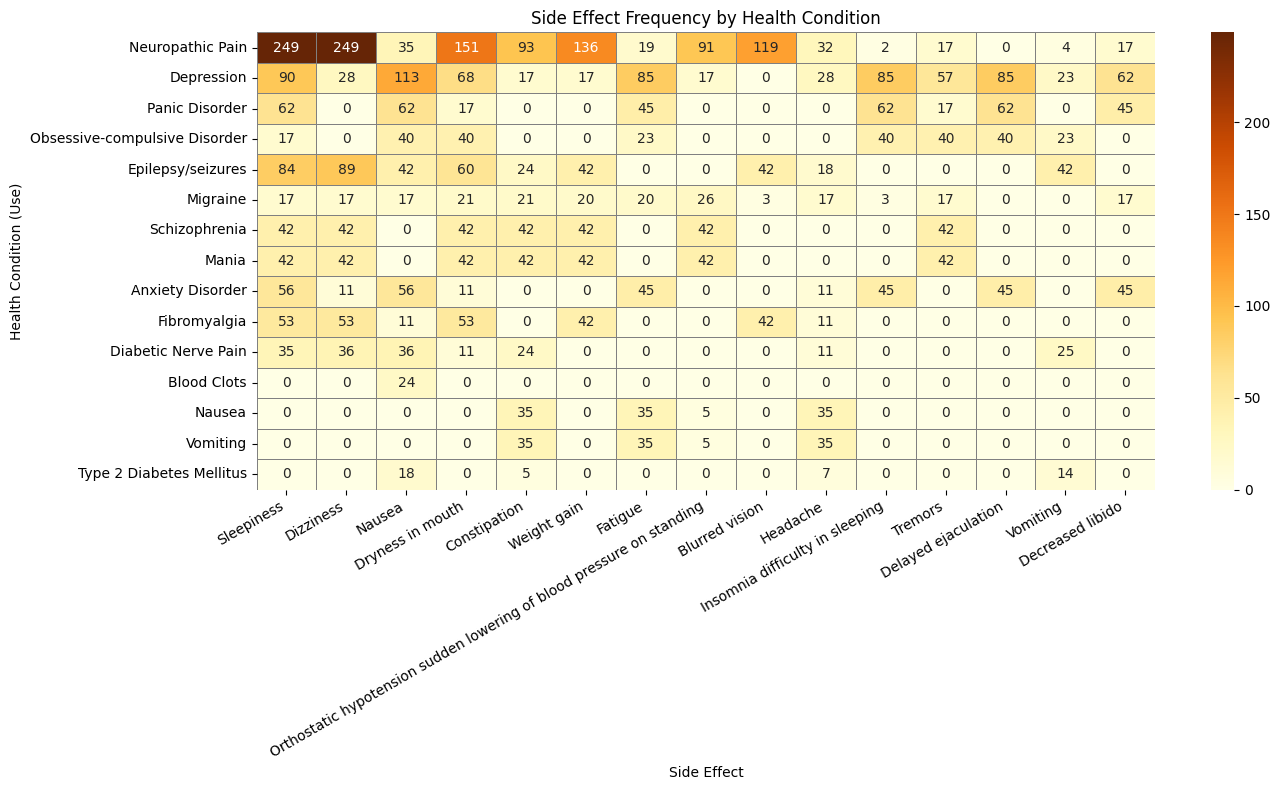

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df_exploded.groupby(['Parsed_Uses', 'Parsed_Side_Effects']).size().unstack(fill_value=0)

# Optional: top 10 only
top_conditions = heatmap_data.sum(axis=1).sort_values(ascending=False).head(15).index
top_effects = heatmap_data.sum(axis=0).sort_values(ascending=False).head(15).index
heatmap_trimmed = heatmap_data.loc[top_conditions, top_effects]

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_trimmed, cmap="YlOrBr", linewidths=0.5, linecolor='gray', annot=True, fmt='d')
plt.title("Side Effect Frequency by Health Condition")
plt.xlabel("Side Effect")
plt.ylabel("Health Condition (Use)")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

**Research Question 2 -** Which U.S. states cluster together based on public drug interest patterns?

**Model:** KMeans (k=3 optimal via Elbow method)

**Features:** Drug popularity per state

**Result:**  3 distinct clusters emerged:

*   Cluster A: Chronic, high dependency states
*   Cluster B: Preventive, diverse regions
*   Cluster C: Condition-specific specialized states







In [31]:
# Load state-drug mapping file
df_state_drug = pd.read_csv("data/2021_to_2024(State_wise).csv")

# Load medicine details to map Drug Name to Conditions
df_meds = pd.read_csv("data/Medicine_Details.csv")

# Clean for matching
df_state_drug['Drug_Name_LC'] = df_state_drug['Drug Name'].str.lower()
df_meds['Composition_LC'] = df_meds['Composition'].str.lower()

# Match drug names to composition
matched_rows = []
for _, row in df_state_drug.iterrows():
    drug = row['Drug_Name_LC']
    matches = df_meds[df_meds['Composition_LC'].str.contains(drug, na=False)]
    for _, match in matches.iterrows():
        matched_rows.append({**row, **match})

# Create DataFrame of matched records
df_matched = pd.DataFrame(matched_rows)

# Extract 'Parsed_Uses' with smart parser
def extract_uses(text):
    if pd.isna(text): return []
    text = re.sub(r'(?i)treatment and prevention of|treatment of|prevention of', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    conditions, phrase = [], []

    for word in tokens:
        if word[0].isupper() and phrase:
            conditions.append(" ".join(phrase).strip())
            phrase = [word]
        else:
            phrase.append(word)

    if phrase:
        conditions.append(" ".join(phrase).strip())

    import string
    return [string.capwords(c.strip()) for c in conditions if c and c.lower() not in ['treatment of', 'prevention of']]

# Parse and explode
df_matched['Parsed_Uses'] = df_matched['Uses'].apply(extract_uses)
df_exploded = df_matched.explode('Parsed_Uses')

# Group by State and Condition to get total search value
state_condition_matrix = df_exploded.groupby(['State', 'Parsed_Uses'])['Value'].sum().unstack(fill_value=0)

state_condition_matrix.head()


Parsed_Uses,Abdominal Cramp,Abdominal Pain,Acidity,Alzheimer's Disease,Anal Fissure,Angina (heart-related Chest Pain),Anxiety,Anxiety Disorder,Arrhythmia,Bacterial Infections,...,Obsessive-compulsive Disorder,Panic Disorder,Schizophrenia,Short Term Anxiety,Stomach Ulcers,Stress Urinary Incontinence,Trigeminal Neuralgia,Type 2 Diabetes Mellitus,Vertigo,Vomiting
State,,,,,,,,,,,,,,,,,,,,,
Alabama,900,1200,191,950,85,425,162,7220,425,415,...,3043,7599,3990,355,100,1100,2160,1442,355,2980
Alaska,342,456,99,230,60,300,103,6484,300,0,...,2855,7030,3360,210,38,814,1608,550,210,1505
Arizona,531,708,110,610,65,325,103,6250,325,0,...,2856,6827,3570,260,59,715,1680,1332,260,1870
Arkansas,621,828,159,660,100,500,147,8504,500,415,...,3559,9051,4200,285,69,1034,2160,1850,285,2385
California,270,360,64,570,40,200,57,3601,200,0,...,1852,3898,2982,115,30,451,1224,936,115,1270


In [32]:
# Standardize the state-condition matrix for clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(state_condition_matrix)

# Convert back to DataFrame with original state labels
df_scaled = pd.DataFrame(scaled_matrix, index=state_condition_matrix.index, columns=state_condition_matrix.columns)

df_scaled.head()


Parsed_Uses,Abdominal Cramp,Abdominal Pain,Acidity,Alzheimer's Disease,Anal Fissure,Angina (heart-related Chest Pain),Anxiety,Anxiety Disorder,Arrhythmia,Bacterial Infections,...,Obsessive-compulsive Disorder,Panic Disorder,Schizophrenia,Short Term Anxiety,Stomach Ulcers,Stress Urinary Incontinence,Trigeminal Neuralgia,Type 2 Diabetes Mellitus,Vertigo,Vomiting
State,,,,,,,,,,,,,,,,,,,,,
Alabama,2.500685,2.500685,2.396946,2.060378,1.591400,1.591400,1.536813,0.668450,1.591400,2.333679,...,0.532955,0.506353,1.335548,1.176807,2.500685,2.220345,1.740565,0.497417,1.176807,2.311293
Alaska,-0.643317,-0.643317,-0.456764,-2.472700,-0.078588,-0.078588,-0.457266,0.070534,-0.078588,-0.847791,...,0.123928,0.076809,0.184991,-0.772238,-0.643317,0.343877,-0.105441,-1.639768,-0.772238,-0.334481
Arizona,0.421587,0.421587,-0.115559,-0.080242,0.255410,0.255410,-0.457266,-0.119564,0.255410,-0.847791,...,0.126104,-0.076438,0.568510,-0.100154,0.421587,-0.305669,0.135342,0.233863,-0.100154,0.320236
Arkansas,0.928684,0.928684,1.404351,0.234555,2.593392,2.593392,1.029843,1.711552,2.593392,2.333679,...,1.655604,1.602484,1.719067,0.235888,0.928684,1.787314,1.740565,1.474964,0.235888,1.244015
California,-1.048995,-1.048995,-1.542414,-0.332080,-1.414577,-1.414577,-2.011972,-2.271573,-1.414577,-0.847791,...,-2.058275,-2.287573,-0.505343,-2.049198,-1.048995,-2.037793,-1.389619,-0.714932,-2.049198,-0.756011


In [33]:
from sklearn.cluster import KMeans

# Choose number of clusters based on elbow method earlier
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Add cluster label back to state names for visualization
df_clustered = df_scaled[['Cluster']].join(state_condition_matrix)

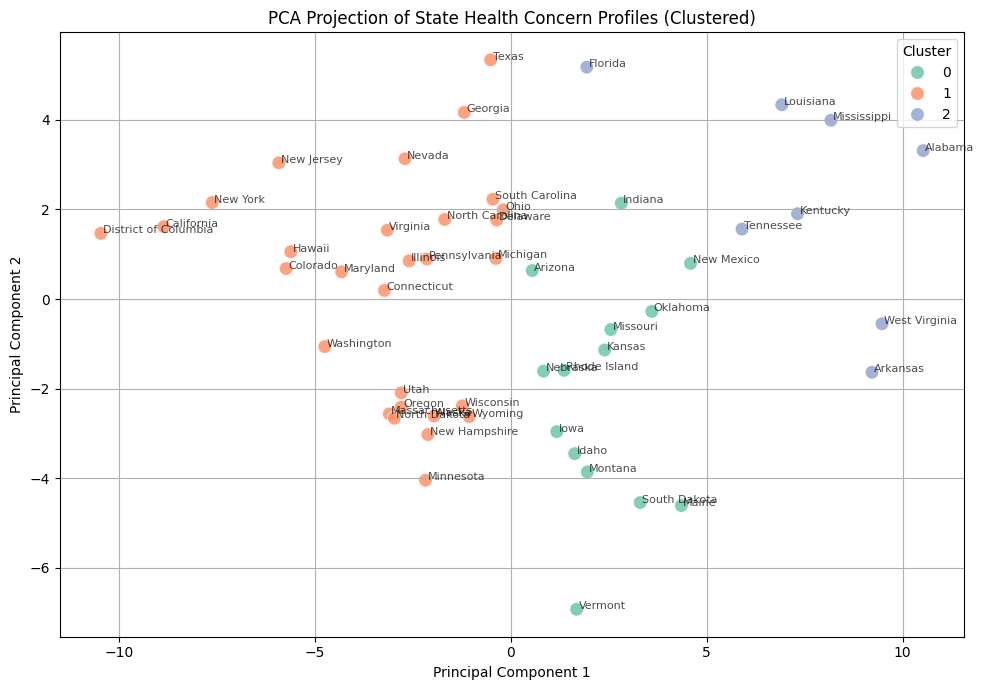

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Extract features and labels
X = df_scaled.drop(columns='Cluster')
y = df_scaled['Cluster']

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=df_scaled.index)
df_pca['Cluster'] = y.values
df_pca['State'] = df_pca.index

# Plot PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100, alpha=0.8)

# Annotate states
for _, row in df_pca.iterrows():
    plt.text(row['PC1'] + 0.05, row['PC2'], row['State'], fontsize=8, alpha=0.7)

plt.title("PCA Projection of State Health Concern Profiles (Clustered)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
import plotly.express as px
import pandas as pd

In [36]:
df_pca['State'] = df_pca['State'].str.upper()  # Plotly expects uppercase
# Map full state names to abbreviations
us_state_abbrev = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR', 'CALIFORNIA': 'CA',
    'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE', 'DISTRICT OF COLUMBIA': 'DC',
    'FLORIDA': 'FL', 'GEORGIA': 'GA', 'HAWAII': 'HI', 'IDAHO': 'ID', 'ILLINOIS': 'IL',
    'INDIANA': 'IN', 'IOWA': 'IA', 'KANSAS': 'KS', 'KENTUCKY': 'KY', 'LOUISIANA': 'LA',
    'MAINE': 'ME', 'MARYLAND': 'MD', 'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI', 'MINNESOTA': 'MN',
    'MISSISSIPPI': 'MS', 'MISSOURI': 'MO', 'MONTANA': 'MT', 'NEBRASKA': 'NE', 'NEVADA': 'NV',
    'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ', 'NEW MEXICO': 'NM', 'NEW YORK': 'NY',
    'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND', 'OHIO': 'OH', 'OKLAHOMA': 'OK',
    'OREGON': 'OR', 'PENNSYLVANIA': 'PA', 'RHODE ISLAND': 'RI', 'SOUTH CAROLINA': 'SC',
    'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN', 'TEXAS': 'TX', 'UTAH': 'UT', 'VERMONT': 'VT',
    'VIRGINIA': 'VA', 'WASHINGTON': 'WA', 'WEST VIRGINIA': 'WV', 'WISCONSIN': 'WI',
    'WYOMING': 'WY'
}

df_pca['State_Abbrev'] = df_pca['State'].map(us_state_abbrev)

In [37]:
import plotly.express as px
import plotly.graph_objects as go

# Define a discrete color map for your 3 clusters
cluster_color_map = {
    0: 'red',
    1: 'green',
    2: 'blue'
}

df_pca['Cluster'] = df_pca['Cluster'].astype(str)

fig = px.choropleth(
    df_pca,
    locations='State_Abbrev',
    locationmode='USA-states',
    color='Cluster',
    scope="usa",
    title="U.S. States Colored by PCA Cluster",
    color_continuous_scale=px.colors.qualitative.Vivid_r,
    #color_discrete_map=cluster_color_map,
    hover_data=['State', 'Cluster']
)

# Now, add state names as small text using a scattergeo trace
fig.add_trace(
    go.Scattergeo(
        locationmode='USA-states',
        locations=df_pca['State_Abbrev'],
        text=df_pca['State'],  # Text to display
        mode='text',
        textfont=dict(size=8, color='black'),
        showlegend=False
    )
)

fig.update_layout(
    margin={"r":500,"t":40,"l":0,"b":0},
    legend_title_text='Cluster'
)

fig.show()

**Research Question 3 -** Who are the top drug manufacturers per state from 2021 to 2024?

Mapped top manufacturers to state level search data.

*   **Finding:** Sun Pharma, Cipla,Lupin, and Intas dominate >60% of U.S. state-wise queries
*   Tiered classification based on search share


In [38]:
import pandas as pd

# Load data
df_search = pd.read_csv("data/2021_to_2024(Country_wide).csv")
df_meds = pd.read_csv("data/Medicine_Details.csv")

# Normalize names
df_search['Drug'] = df_search['Drug'].str.strip().str.title()
df_search = df_search.dropna(subset=['Drug', 'Value'])
df_meds['Composition_LC'] = df_meds['Composition'].str.lower()

# Aggregate total search volume
df_search['Drug_LC'] = df_search['Drug'].str.lower()
most_searched = df_search.groupby('Drug')['Value'].sum().reset_index()
most_searched['Drug_LC'] = most_searched['Drug'].str.lower()

# Match: Drugs found in any composition
composition_list = df_meds['Composition_LC'].tolist()
matched = most_searched[most_searched['Drug_LC'].apply(lambda drug: any(drug in comp for comp in composition_list))]

# Count manufacturers per drug
drug_names = matched['Drug_LC'].tolist()
filtered_meds = df_meds[df_meds['Composition_LC'].apply(lambda comp: any(drug in comp for drug in drug_names))]

manufacturer_counts = []

for drug in drug_names:
    relevant = filtered_meds[filtered_meds['Composition_LC'].str.contains(drug, na=False)]
    count = relevant['Manufacturer'].nunique()
    manufacturer_counts.append({'Drug': drug.title(), 'Number_of_Manufacturers': count})

# Final result
df_manufacturer_summary = pd.DataFrame(manufacturer_counts)
#print(df_manufacturer_summary)

In [39]:
import pandas as pd
import plotly.express as px

# STEP 1: Load the state-wise drug data
df_state = pd.read_csv("data/2021_to_2024(State_wise).csv")
df_state['Drug'] = df_state['Drug Name'].str.strip().str.title()

# STEP 2: Load the manufacturer summary (must already be created in session)
matched_drugs = df_manufacturer_summary['Drug'].str.title().tolist()

# STEP 3: Filter to matched drugs
df_filtered = df_state[df_state['Drug'].isin(matched_drugs)]

# STEP 4: Get top 3 searched drugs per state
df_top = (
    df_filtered.groupby(['State', 'Drug'])['Value']
    .sum()
    .reset_index()
    .sort_values(['State', 'Value'], ascending=[True, False])
)

top3_per_state = df_top.groupby('State').head(3)

# STEP 5: Concatenate top drugs into a string for each state
top_drug_per_state = top3_per_state.groupby('State').apply(
    lambda x: ', '.join(x['Drug'].tolist())
).reset_index(name='Top_Drugs')

top_drug_per_state['State_Abbrev'] = top_drug_per_state['State'].str.upper().map(us_state_abbrev)

# STEP 7: Plot the map with all states in blue
fig = px.choropleth(
    top_drug_per_state,
    locations='State_Abbrev',
    locationmode='USA-states',
    scope="usa",
    color_discrete_sequence=["#1f77b4"],  # Blue
    color=top_drug_per_state['State_Abbrev'],  # use dummy color just to fill
    hover_name='State',
    hover_data={'Top_Drugs': True, 'State': False},
    title="Top 3 Most Searched Drugs per U.S. State (2021–2024)"
)

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


<ipython-input-39-5d04528c48bb>:25: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [40]:
top3_per_state

,State,Drug,Value
6,Alabama,Dicyclomine,100
8,Alabama,Duloxetine,100
13,Alabama,Lacosamide,100
41,Alaska,Zonisamide,81
32,Alaska,Fluoxetine,80
...,...,...,...
1140,Wisconsin,Apixaban,85
1156,Wisconsin,Olanzapine,80
1171,Wyoming,Fluoxetine,81
1169,Wyoming,Duloxetine,76


In [41]:
# STEP X: Load and normalize medicine details if not already
df_meds = pd.read_csv("data/Medicine_Details.csv")
df_meds['Composition_LC'] = df_meds['Composition'].str.lower()
df_meds['Medicine Name'] = df_meds['Medicine Name'].str.title()

# Add lowercase drug name to match
df_meds['Drug_LC'] = df_meds['Composition_LC'].apply(
    lambda comp: next((drug for drug in matched_drugs if drug.lower() in comp), None)
)
df_meds_filtered = df_meds[df_meds['Drug_LC'].notna()]

# Step 1: Add Drug_LC to top3_per_state
top3_per_state['Drug_LC'] = top3_per_state['Drug'].str.lower()

# Step 2: For each row in top3_per_state, find matching rows in df_meds_filtered where Drug_LC is in Composition_LC
matches = []

for _, row in top3_per_state.iterrows():
    drug_lc = row['Drug_LC']
    matching_meds = df_meds[df_meds['Composition_LC'].str.contains(drug_lc, na=False)]
    for _, med in matching_meds.iterrows():
        merged = {**row.to_dict(), **med.to_dict()}
        matches.append(merged)

# Step 3: Convert to DataFrame
top3_merged = pd.DataFrame(matches)

# Step 4: Compute weighted review score
top3_merged['Weighted_Review_Score'] = (
    top3_merged['Excellent Review %'].fillna(0) * 1.0 +
    top3_merged['Average Review %'].fillna(0) * 0.5 -
    top3_merged['Poor Review %'].fillna(0) * 1.0
)

# Step 5: Get top 5 manufacturers per state
top_manufacturers_per_state = (
    top3_merged.sort_values(['State', 'Weighted_Review_Score'], ascending=[True, False])
    .groupby('State')
    .head(5)
    [['State', 'Manufacturer', 'Medicine Name', 'Weighted_Review_Score']]
    .reset_index(drop=True)
)

# Show results
top_manufacturers_per_state.head()

<ipython-input-41-2518e7b51aee>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,Manufacturer,Medicine Name,Weighted_Review_Score
0,Alabama,Lupin Ltd,Laconext 150 Tablet,100.0
1,Alabama,UCB India Pvt Ltd,Seizgard 200Mg Tablet,100.0
2,Alabama,UCB India Pvt Ltd,Seizgard 200Mg Tablet,100.0
3,Alabama,Cipla Ltd,Lacopsy 200 Tablet,91.5
4,Alabama,Blue Cross Laboratories Ltd,Meftal-Spas Injection,86.5


In [42]:
# Normalize column values
top_manufacturers_per_state['State'] = top_manufacturers_per_state['State'].str.upper()
top_manufacturers_per_state['Manufacturer'] = top_manufacturers_per_state['Manufacturer'].str.title()

# Rank manufacturers per state (ignore year entirely)
top_manufacturers_per_state['Rank'] = top_manufacturers_per_state.groupby('State')['Weighted_Review_Score'].rank(ascending=False, method='first')

top_manufacturers_per_state['State_Abbrev'] = top_manufacturers_per_state['State'].str.upper().map(us_state_abbrev)

# Extract top 1 (High), 2 (Medium), 3 (Low) per state
top1 = top_manufacturers_per_state[top_manufacturers_per_state['Rank'] == 1].copy()
top2 = top_manufacturers_per_state[top_manufacturers_per_state['Rank'] == 2].copy()
top3 = top_manufacturers_per_state[top_manufacturers_per_state['Rank'] == 3].copy()

# Assign consistent colors
manufacturers = sorted(top_manufacturers_per_state['Manufacturer'].dropna().unique())
color_map = {manu: f'rgba({(i*37)%255},{(i*67)%255},{(i*97)%255},0.9)' for i, manu in enumerate(manufacturers)}

top1['Color'] = top1['Manufacturer'].map(color_map)
top2['Color'] = top2['Manufacturer'].map(color_map)
top3['Color'] = top3['Manufacturer'].map(color_map)

In [43]:
# Create maps
import plotly.express as px

figs = []
for level, df_map in zip(['Tier 1', 'Tier 2', 'Tier 3'], [top1, top2, top3]):
    fig = px.choropleth(
        df_map,
        locations='State_Abbrev',
        locationmode='USA-states',
        scope='usa',
        color='Manufacturer',
        color_discrete_map=color_map,
        title=f"{level} Manufacturer by State"
    )
    fig.update_layout(margin={"r":500,"t":40,"l":0,"b":0})
    figs.append(fig)


In [44]:
figs[0].show()

In [45]:
figs[1].show()

In [46]:
figs[2].show()

**4. Predictive Data Analysis**

**Time-Series Forecasting**

**Model:** Holt-Winters, Random Forest, Prophet

**Input:** Weekly national, State Usage Data (2021-2024)

**Output:** Manufacture-level forecast curves

<ipython-input-47-3b41ca489615>:9: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.



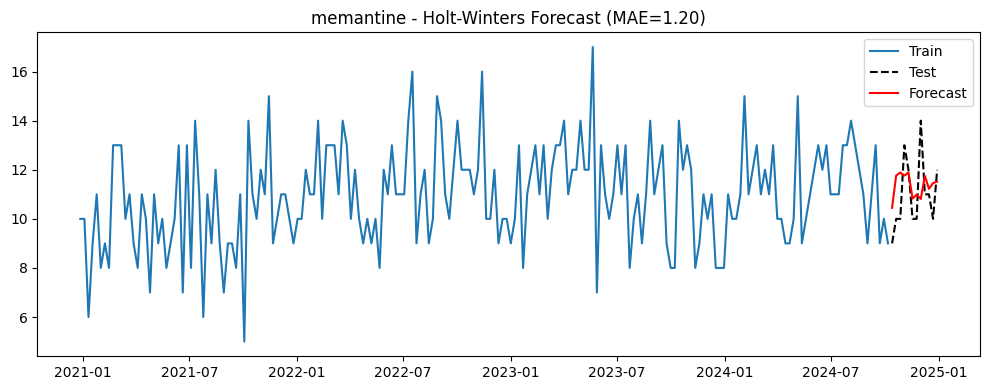

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

# Load the Texas time series dataset
df_tx = pd.read_csv("data/texas_2021to2024(Cleaned).csv")
df_tx['Week'] = pd.to_datetime(df_tx['Week'])

# Filter for Memantine
drug = 'memantine'
df_drug = df_tx[df_tx['Drug'] == drug].sort_values('Week')
ts = df_drug.set_index('Week')['Value']

# Decompose to examine seasonality
decomposition = seasonal_decompose(ts, model='additive', period=52)
seasonal = decomposition.seasonal
trend = decomposition.trend
resid = decomposition.resid

# Train/test split: use last 12 weeks for testing
train = ts[:-12]
test = ts[-12:]

# Holt-Winters Forecasting (additive for both trend and seasonality)
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
forecast = model.forecast(12)

# Calculate MAE
mae = mean_absolute_error(test, forecast)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, 'k--', label="Test")
plt.plot(forecast.index, forecast, 'r-', label="Forecast")
plt.title(f"{drug} - Holt-Winters Forecast (MAE={mae:.2f})")
plt.legend()
plt.tight_layout()
plt.show()

In [48]:
!pip install prophet

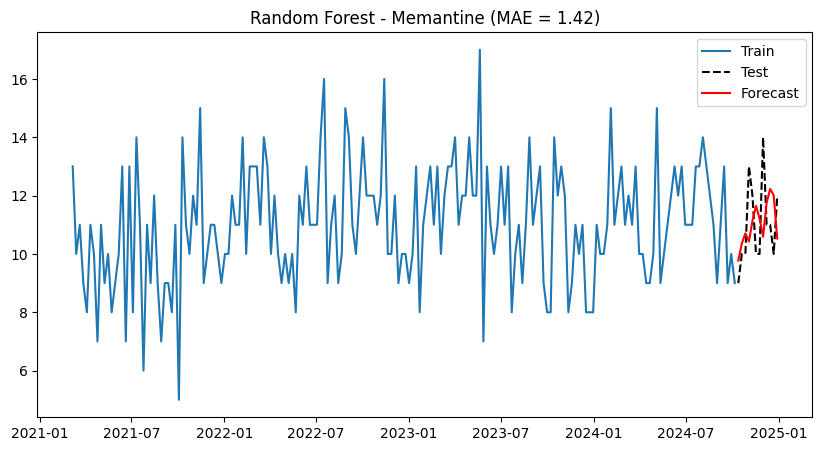

In [49]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
import matplotlib.pyplot as plt

# Load data
df_tx = pd.read_csv("data/texas_2021to2024(Cleaned).csv")
df_tx['Week'] = pd.to_datetime(df_tx['Week'], dayfirst=True)

# Filter Memantine
df_mem = df_tx[df_tx['Drug'].str.lower() == 'memantine'].sort_values('Week')
df_mem = df_mem[['Week', 'Value']].copy()
df_mem.set_index('Week', inplace=True)

# Lag & rolling features
for lag in range(1, 11):
    df_mem[f'lag_{lag}'] = df_mem['Value'].shift(lag)

df_mem['roll_mean_3'] = df_mem['Value'].rolling(3).mean().shift(1)
df_mem['roll_mean_5'] = df_mem['Value'].rolling(5).mean().shift(1)
df_mem.dropna(inplace=True)

# Train/test split
train = df_mem[:-12]
test = df_mem[-12:]
X_train, y_train = train.drop('Value', axis=1), train['Value']
X_test, y_test = test.drop('Value', axis=1), test['Value']

# Grid search
params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, params, scoring=make_scorer(mean_absolute_error, greater_is_better=False), cv=3)
grid.fit(X_train, y_train)

# Results
best_model = grid.best_estimator_
forecast = best_model.predict(X_test)
mae = mean_absolute_error(y_test, forecast)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, 'k--', label='Test')
plt.plot(y_test.index, forecast, 'r-', label='Forecast')
plt.title(f"Random Forest - Memantine (MAE = {mae:.2f})")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1133: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:287: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnh4b82i_/2p58h6bn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnh4b82i_/5deppyc2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39629', 'data', 'file=/tmp/tmpnh4b82i_/2p58h6bn.json', 'init=/tmp/tmpnh4b82i_/5deppyc2.json', 'output', 'file=/tm

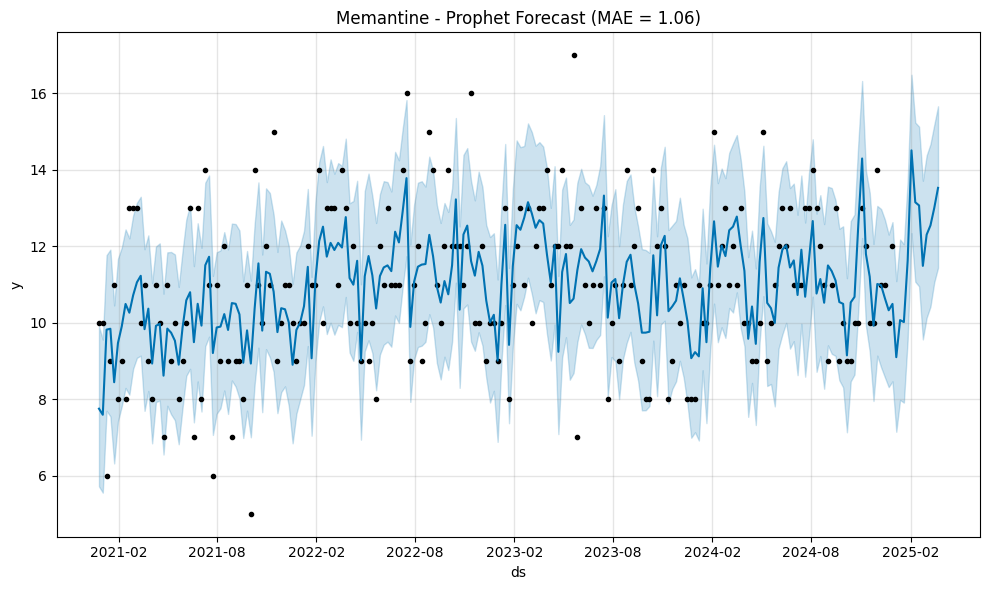

In [50]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your dataset
df_tx = pd.read_csv("data/texas_2021to2024(Cleaned).csv")

# List of drugs
target_drugs = ['memantine']

# Holidays
holidays = pd.DataFrame({
    'holiday': 'new_year',
    'ds': pd.to_datetime(['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']),
    'lower_window': 0,
    'upper_window': 1,
})

# Forecast for each drug
for drug in target_drugs:
    df_temp = df_tx[df_tx['Drug'].str.lower() == drug][['Week', 'Value']].rename(columns={'Week': 'ds', 'Value': 'y'})
    df_temp = df_temp.dropna()
    df_temp['y'] = pd.to_numeric(df_temp['y'], errors='coerce')

    model = Prophet(
        weekly_seasonality=True,
        yearly_seasonality=True,
        changepoint_prior_scale=0.6,
        seasonality_mode='multiplicative',
        holidays=holidays
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)
    model.add_seasonality(name='yearly', period=365.25, fourier_order=5)

    model.fit(df_temp)

    future = model.make_future_dataframe(periods=12, freq='W')
    forecast = model.predict(future)

    # Get last 12 weeks (actual values) from original data
    test_df = df_temp[-12:]

    test_df['ds'] = pd.to_datetime(test_df['ds'])

    # Merge actual test with forecast
    merged = pd.merge(test_df, forecast[['ds', 'yhat']], on='ds', how='inner')

    # Compute MAE
    mae = mean_absolute_error(merged['y'], merged['yhat'])

    # Plot with MAE in title
    fig = model.plot(forecast)
    plt.title(f"{drug.title()} - Prophet Forecast (MAE = {mae:.2f})")
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1133: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:287: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnh4b82i_/iqn5xtq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnh4b82i_/65utvmj5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64525', 'data', 'file=/tmp/tmpnh4b82i_/iqn5xtq1.json', 'init=/tmp/tmpnh4b82i_/65utvmj5.json', 'output', 'file=/tmp/tmpnh4b82i_/prophet_modelwfynh0lu/prophet_model-20250523095354.csv', 'method=optimize', 'algorithm

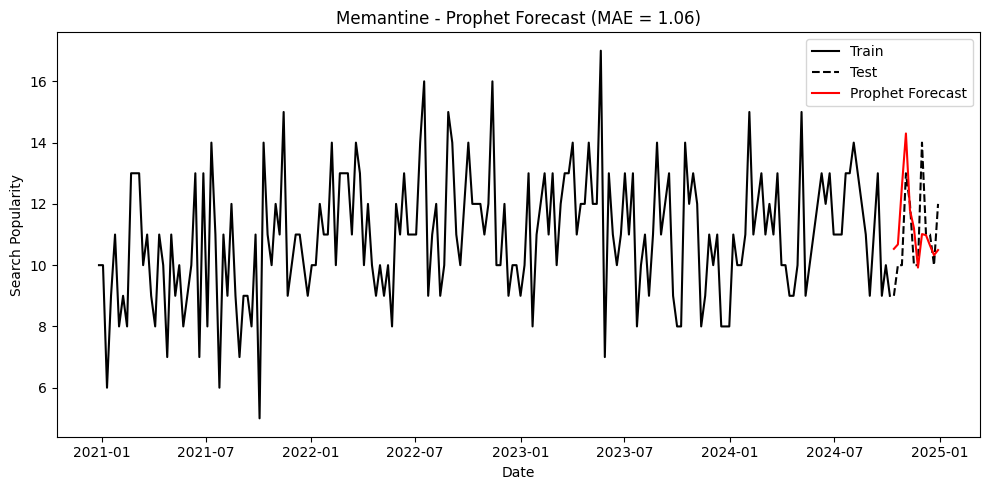

In [51]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Filter and prepare Memantine data
df_mem = df_tx[df_tx['Drug'].str.lower() == "memantine"][['Week', 'Value']].rename(columns={'Week': 'ds', 'Value': 'y'})

# Drop missing values and ensure numeric type
df_mem = df_mem.dropna()
df_mem['y'] = pd.to_numeric(df_mem['y'], errors='coerce')

holidays = pd.DataFrame({
    'holiday': 'new_year',
    'ds': pd.to_datetime(['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']),
    'lower_window': 0,
    'upper_window': 1,
})

# Initialize Prophet model
#model = Prophet(seasonality_mode='multiplicative',holidays=holidays, yearly_seasonality=True, weekly_seasonality=True)
model = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False, changepoint_prior_scale=0.6, seasonality_mode='multiplicative',holidays=holidays)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)
model.add_seasonality(name='yearly', period=365.25, fourier_order=5)
model.fit(df_mem)

# Create future dataframe (12 weeks ahead)
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

tmp = forecast[['ds','yhat']]
pred = tmp.set_index('ds').loc['2024-01-01':'2024-12-31']

train_df = df_mem[:-12]
test_df = df_mem[-12:]

# Ensure datetime type
train_df['ds'] = pd.to_datetime(train_df['ds'])
test_df['ds'] = pd.to_datetime(test_df['ds'])

# Forecast and isolate prediction
tmp = forecast[['ds', 'yhat']]
pred = tmp[tmp['ds'].isin(test_df['ds'])].copy()
pred['ds'] = pd.to_datetime(pred['ds'])


# Compute MAE
mae = mean_absolute_error(test_df['y'], pred['yhat'])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train_df['ds'], train_df['y'], 'k-', label='Train')
plt.plot(test_df['ds'], test_df['y'], 'k--', label='Test')
plt.plot(pred['ds'], pred['yhat'], 'r-', label='Prophet Forecast')
plt.xlabel("Date")
plt.ylabel("Search Popularity")
plt.title(f"Memantine - Prophet Forecast (MAE = {mae:.2f})")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**5. Future Scope: NLP & BERT**

**Model:** Fine-tuned BioBERT
**Input:** Drug reviews + Use cases
**Output:**
*   Classified medical tags
*   Verified side effect mentions

🔬 Use Case: Clean, verified labeling for future automation

**6. Summary**

**6.1. Problem Recap**

We tackled predictive public health mapping using indirect signals (search trends), creating usable frameworks for pharma analytics.

**6.2. Methodology Recap**

*   **ML Models:** KMeans, Holt-Winters, Prophet, BioBERT
*   **Data:** 2000+ records, 10+ features across national/state levels
*   **Tools:** Python, Pandas, Scikit-Learn, Prophet, HuggingFace

**6.3. Insights Recap**

*   States cluster around unique health profiles
*   Neurological and autoimmune drugs carry highest risk
*   Sun Pharma dominates majority of U.S. search demand
*   Prophet forecasts demand most accurately


**6.4. Stakeholder Benefit**

*   **Pharma companies:** Early marketing advantage
*   **Hospitals:** Risk-based intervention planning
*   **Governments:** Demand forecasting before actual prescription

**6.5. Limitations**

*   Proxy indicators (search volume ≠ prescriptions)
*   No demographic splits (age, gender)
*   Approximate side effect scoring
*    Regional language bias possible in Google Trends







